IMPORTING THE DEPENDENCIES

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#difflib is used to compare different strings and helps in finding out the similar entities with the input 
#TfidVectorizer is used to convert textual values to numerical values

DATA COLLECTION AND PREPROCESSING OF MOVIES

In [2]:
movie_data = pd.read_csv('movies.csv', sep="::", engine="python", names=["movie_id", "name", "genre"])                    

In [3]:
movie_data.head()

,movie_id,name,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movie_data.shape

(3883, 3)

In [5]:
movie_data.info

<bound method DataFrame.info of       movie_id                                name  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
3878      3948             Meet the Parents (2000)   
3879      3949          Requiem for a Dream (2000)   
3880      3950                    Tigerland (2000)   
3881      3951             Two Family House (2000)   
3882      3952               Contender, The (2000)   

                             genre  
0      Animation|Children's|Comedy  
1     Adventure|Children's|Fantasy  
2                   Comedy|Romance  
3                     Comedy|Drama  
4                           Comedy  
...                            ...  
3878                        Comedy  
3879                   

In [6]:
movie_data.isnull().sum()

movie_id    0
name        0
genre       0
dtype: int64

DATA COLLECTION AND PREPROCESSING OF RATING

In [7]:
rating_data = pd.read_csv('ratings.csv', sep="::", engine='python', names=["userid", "movieid", "rating", "timestamp"])

In [8]:
rating_data.head()

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   userid     1000209 non-null  int64
 1   movieid    1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [10]:
rating_data.shape

(1000209, 4)

In [11]:
rating_data.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

DATA COLLECTION AND PREPROCESSING OF USERS

In [12]:
user_data = pd.read_csv('users.csv', sep="::", names=["userid", "sex", "age", "occupation", "zipcode"])

C:\Users\gaura\AppData\Local\Temp\ipykernel_7528\382149253.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  user_data = pd.read_csv('users.csv', sep="::", names=["userid", "sex", "age", "occupation", "zipcode"])


In [13]:
user_data.head()

,userid,sex,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [14]:
user_data.shape

(6040, 5)

In [15]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userid      6040 non-null   int64 
 1   sex         6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [16]:
user_data.isnull().sum()

userid        0
sex           0
age           0
occupation    0
zipcode       0
dtype: int64

ENCODING THE CATEGORICAL COLUMNS

In [17]:
labelencoder = LabelEncoder()
user_data["sex"] = labelencoder.fit_transform(user_data["sex"])

In [18]:
user_data.head()

,userid,sex,age,occupation,zipcode
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,02460
4,5,1,25,20,55455


CONCATENATING THE DATASETS AND REMOVING THE UNNECESSARY COLUMNS

In [19]:
data = pd.concat([movie_data, rating_data, user_data], axis=1)

In [20]:
data.head()

,movie_id,name,genre,userid,movieid,rating,timestamp,userid,sex,age,occupation,zipcode
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,0.0,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1.0,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1.0,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1.0,45.0,7.0,02460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1.0,25.0,20.0,55455


In [21]:
data.shape

(1000209, 12)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   movie_id    3883 non-null     float64
 1   name        3883 non-null     object 
 2   genre       3883 non-null     object 
 3   userid      1000209 non-null  int64  
 4   movieid     1000209 non-null  int64  
 5   rating      1000209 non-null  int64  
 6   timestamp   1000209 non-null  int64  
 7   userid      6040 non-null     float64
 8   sex         6040 non-null     float64
 9   age         6040 non-null     float64
 10  occupation  6040 non-null     float64
 11  zipcode     6040 non-null     object 
dtypes: float64(5), int64(4), object(3)
memory usage: 91.6+ MB


In [23]:
data.isnull().sum()

movie_id      996326
name          996326
genre         996326
userid             0
movieid            0
rating             0
timestamp          0
userid        994169
sex           994169
age           994169
occupation    994169
zipcode       994169
dtype: int64

In [24]:
data = data.drop(["zipcode", "timestamp", "occupation"], axis=1)

In [25]:
data.head()

,movie_id,name,genre,userid,movieid,rating,userid,sex,age
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,1.0,0.0,1.0
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0


In [26]:
data.isnull().sum()

movie_id    996326
name        996326
genre       996326
userid           0
movieid          0
rating           0
userid      994169
sex         994169
age         994169
dtype: int64

HANDLING MISSING VALUES

In [27]:
data = data.dropna()
data.shape

(3883, 9)

DATA VISUALIZATION

In [38]:
sns.set()

<Axes: xlabel='sex', ylabel='count'>

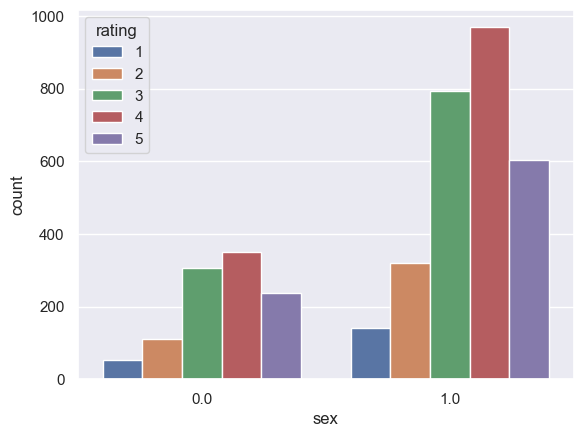

In [39]:
sns.countplot(x="sex", hue="rating", data=data)

Text(0.5, 1.0, 'Distibution of genders who vote')

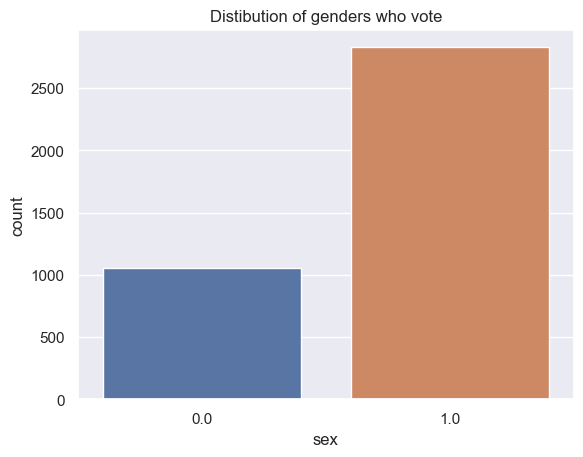

In [40]:
sns.countplot(x="sex", data=data)
plt.title("Distibution of genders who vote")

Text(0.5, 0, 'Age')

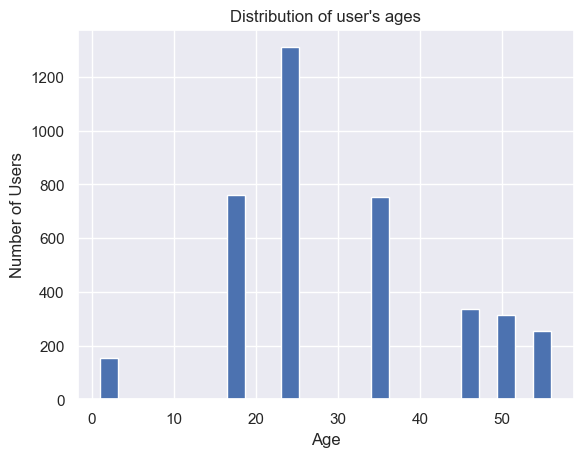

In [41]:
data.age.plot.hist(bins=25)
plt.title("Distribution of user's ages")
plt.ylabel("Number of Users")
plt.xlabel("Age")

<Axes: xlabel='rating', ylabel='count'>

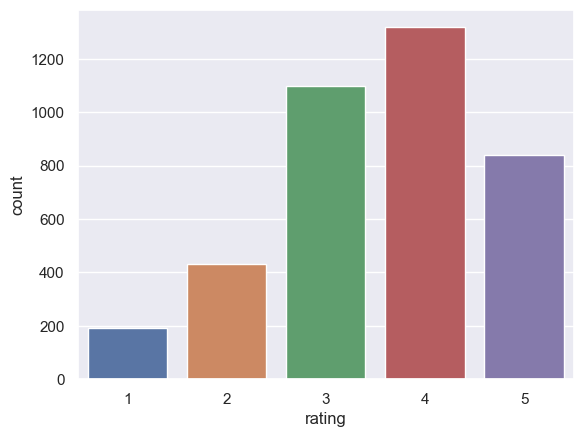

In [42]:
sns.countplot(x='rating', data=data)

<Axes: xlabel='rating', ylabel='count'>

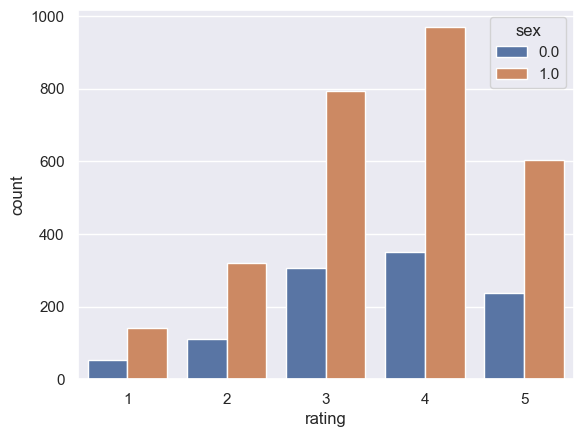

In [43]:
sns.countplot(x="rating", hue="sex", data=data)

In [44]:
data['age'].value_counts()

age
25.0    1311
18.0     760
35.0     753
45.0     337
50.0     315
56.0     255
1.0      152
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='count'>

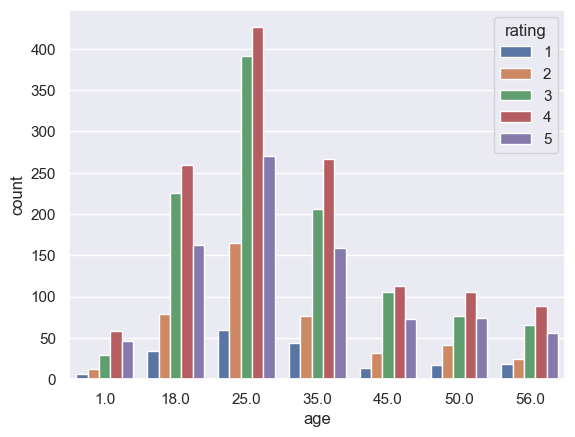

In [45]:
sns.countplot(x='age', hue='rating', data=data)

SEPARATING FEATURES AND TARGETS

In [46]:
data.head()

,movie_id,name,genre,userid,movieid,rating,userid,sex,age
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,1.0,0.0,1.0
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0


In [48]:
X = data.drop(['movieid', 'name', 'genre', 'userid', 'rating'], axis=1)
Y = data['rating']

In [49]:
print(X)

      movie_id  sex   age
0          1.0  0.0   1.0
1          2.0  1.0  56.0
2          3.0  1.0  25.0
3          4.0  1.0  45.0
4          5.0  1.0  25.0
...        ...  ...   ...
3878    3948.0  1.0  25.0
3879    3949.0  1.0  25.0
3880    3950.0  1.0  18.0
3881    3951.0  1.0  56.0
3882    3952.0  1.0  50.0

[3883 rows x 3 columns]


In [50]:
print(Y)

0       5
1       3
2       3
3       4
4       5
       ..
3878    4
3879    2
3880    3
3881    5
3882    4
Name: rating, Length: 3883, dtype: int64


SPLITTING THE DATA INTO TEST AND TRAINING DATASETS

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=53)

In [88]:
print(X.shape, X_train.shape, X_test.shape)

(3883, 3) (3106, 3) (777, 3)


MODEL EVALUATION FOR ACCURACY SCORE USING SVM

In [100]:
model = SVC(random_state=50)

In [101]:
model.fit(X_train, Y_train)

SVC(random_state=50)

In [102]:
X_train_prediction = model.predict(X_train)

In [103]:
print(X_train_prediction)

[4 4 4 ... 4 4 3]


In [104]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy Score of Training Data using SVM:",training_data_accuracy)

Accuracy Score of Training Data using SVM: 0.34964584674822924


MODEL EVALUATION FOR ACCURACY USING LOGISTIC REGRESSION

In [115]:
model2 = LogisticRegression()

In [116]:
model2.fit(X_train, Y_train)

c:\Users\gaura\Desktop\DataScience\datascience\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [117]:
X_train_prediction2 = model2.predict(X_train)

In [118]:
training2_accuracy_score = accuracy_score(Y_train, X_train_prediction2)
print("Accuracy Score of Training Data using LOGISTIC REGRESSION:",training2_accuracy_score)

Accuracy Score of Training Data using LOGISTIC REGRESSION: 0.33902124919510623


MODEL EVALUATION FOR ACCURACY USING DECISION TREES

In [120]:
model3 = DecisionTreeClassifier()

In [121]:
model3.fit(X_train, Y_train)

DecisionTreeClassifier()

In [122]:
X_train_prediction3 = model3.predict(X_train)

In [126]:
training_data_accuracy3 = accuracy_score(Y_train, X_train_prediction3)
print("Accuracy Score of Training Data using DECISION TREES:", training_data_accuracy3)

Accuracy Score of Training Data using DECISION TREES: 1.0


In [124]:
X_test_prediction = model3.predict(X_test)

In [125]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy Score of Testing Data using DECISION TREES:", test_data_accuracy)

Accuracy Score of Testing Data using DECISION TREES: 0.29987129987129985
